# Camera Calibration
<b>woflydev | FTC 17556</b>

### Import Packages

In [1]:
import numpy as np
import cv2
import glob
import pickle
import collections
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Calibrate

Extract `objpoints` and `imgpoints` using images of calibration grid taken from the camera.

In [2]:
cell_size = 0.07 # Size of the square cell (should not affect the result)
objp = np.zeros((6*9,3), np.float32) # Using a 6x9 grid image for calibration
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)*cell_size # Grid points

# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Make a list of calibration images
images = glob.glob('images/*.jpg')

# Step through the list and search for grid corners
for image in images:
    img = mpimg.imread(image)
    gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the grid corners
    ret, corners = cv2.findChessboardCorners(gray_img, (9,6),None)

    # If found, append object points and image points to the respective arrays
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('Corner Detection',img)
        cv2.waitKey(500) # Viewing delay in milliseconds

cv2.destroyAllWindows()

Use the `objpoints` and `imgpoints` to calibrate the camera for a specified `imgsize`.

In [4]:
img = mpimg.imread('images/1.jpg') # Read in a test calibration image
img_size = (img.shape[1], img.shape[0]) # Get the image dimensions

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None) # Calibrate the camera

# Print the camera calibration result
print('Distortion Coefficients:')
print('dist = \n' + str(dist))
print('')

print('Camera Intrinsic Parameters:')
print('mtx = \n' + str(mtx))
print('')

print('Camera Extrinsic Parameters:')
print('rvecs = \n' + str(rvecs))
print('')
print('tvecs = \n' + str(tvecs))

# Save the camera calibration result for later use
camera_pickle = {}
camera_pickle["mtx"] = mtx
camera_pickle["dist"] = dist
camera_pickle["rvecs"] = rvecs
camera_pickle["tvecs"] = tvecs
pickle.dump(camera_pickle, open("Camera Parameters.p", "wb"))

Distortion Coefficients:
dist = 
[[ 0.03201133  0.43087633 -0.01753296 -0.01625355 -4.10677589]]

Camera Intrinsic Parameters:
mtx = 
[[1.91086092e+03 0.00000000e+00 6.30917488e+02]
 [0.00000000e+00 1.90780998e+03 4.98104766e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Camera Extrinsic Parameters:
rvecs = 
(array([[ 0.17783329],
       [-0.4547664 ],
       [ 0.08711111]]), array([[-0.01240858],
       [-0.222497  ],
       [ 0.37511001]]), array([[ 0.30397568],
       [-0.72846842],
       [-0.24917114]]), array([[ 0.77907488],
       [-0.01852117],
       [ 0.20648402]]), array([[0.3980604 ],
       [0.18282841],
       [0.25671408]]), array([[-0.08245906],
       [-0.09660071],
       [-1.08498697]]), array([[-0.16119512],
       [-0.11059725],
       [-2.46921735]]), array([[ 0.08166227],
       [-0.06244251],
       [ 0.12389653]]))

tvecs = 
(array([[-0.00520754],
       [-0.20964411],
       [ 3.10137358]]), array([[-0.07424232],
       [-0.28660605],
       [ 1.775398

Undistort a test calibration image (sanity check).

Used: [[1.91086092e+03 0.00000000e+00 6.30917488e+02]
 [0.00000000e+00 1.90780998e+03 4.98104766e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] AND [[ 0.03201133  0.43087633 -0.01753296 -0.01625355 -4.10677589]]


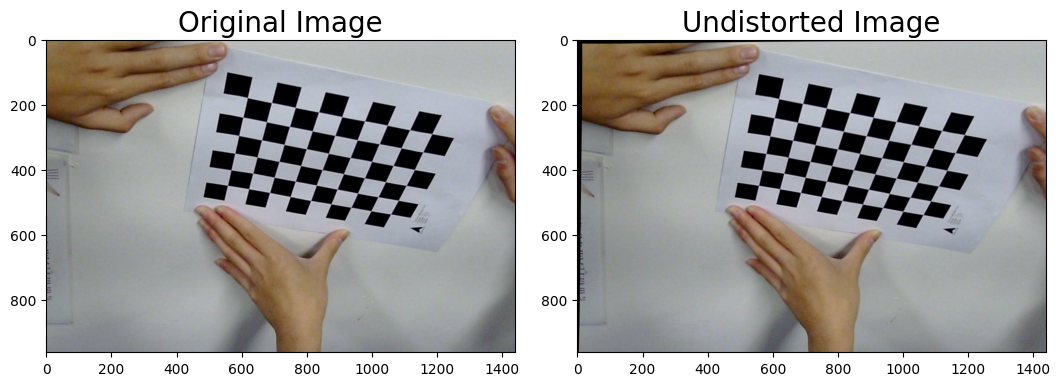

: 

In [7]:
IMAGE_INDEX = 7

img = mpimg.imread(f'images/{IMAGE_INDEX}.jpg') # Read in a test calibration image
undistorted_image = cv2.undistort(img, mtx, dist, None, mtx) # Generate the undistorted image
print(f"Used: {mtx} AND {dist}")

# Plot inline
%matplotlib inline
# View the results side-by-side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=20)
plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.0)
plt.show()

# USE MTX AS CAMERA INTRINSIC VALUES